<h1>Titanic<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#一、数据准备" data-toc-modified-id="一、数据准备-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>一、数据准备</a></span></li><li><span><a href="#二、基础数据分析" data-toc-modified-id="二、基础数据分析-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><b>二、基础数据分析</b></a></span><ul class="toc-item"><li><span><a href="#1、看看那些数据是类别型数据（有序，无序），哪些是数值型数据（连续，离散）" data-toc-modified-id="1、看看那些数据是类别型数据（有序，无序），哪些是数值型数据（连续，离散）-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>1、看看那些数据是类别型数据（有序，无序），哪些是数值型数据（连续，离散）</a></span></li><li><span><a href="#2、看看哪些数据是混合类型数据（既有数值型，又有字符型）" data-toc-modified-id="2、看看哪些数据是混合类型数据（既有数值型，又有字符型）-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2、看看哪些数据是混合类型数据（既有数值型，又有字符型）</a></span></li><li><span><a href="#3、看看哪些数据可能含有错误或者错别字" data-toc-modified-id="3、看看哪些数据可能含有错误或者错别字-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>3、看看哪些数据可能含有错误或者错别字</a></span></li><li><span><a href="#4、看看哪些数据含有空数据或null（这些数据需要被填充）" data-toc-modified-id="4、看看哪些数据含有空数据或null（这些数据需要被填充）-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>4、看看哪些数据含有空数据或null（这些数据需要被填充）</a></span></li><li><span><a href="#5、看看数值型特征在样本中的分布" data-toc-modified-id="5、看看数值型特征在样本中的分布-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>5、看看数值型特征在样本中的分布</a></span></li><li><span><a href="#6、看看类别型特征的分布" data-toc-modified-id="6、看看类别型特征的分布-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>6、看看类别型特征的分布</a></span></li></ul></li><li><span><a href="#三、一些基本分析之上的假设" data-toc-modified-id="三、一些基本分析之上的假设-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>三、一些基本分析之上的假设</a></span><ul class="toc-item"><li><span><a href="#证实假设" data-toc-modified-id="证实假设-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>证实假设</a></span></li><li><span><a href="#可视化数据分析" data-toc-modified-id="可视化数据分析-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>可视化数据分析</a></span></li><li><span><a href="#改造数据" data-toc-modified-id="改造数据-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>改造数据</a></span></li><li><span><a href="#把类别型数据转化为数值型数据" data-toc-modified-id="把类别型数据转化为数值型数据-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>把类别型数据转化为数值型数据</a></span></li><li><span><a href="#填充连续性数值数据" data-toc-modified-id="填充连续性数值数据-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>填充连续性数值数据</a></span></li><li><span><a href="#根据已有特征构建新特征" data-toc-modified-id="根据已有特征构建新特征-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>根据已有特征构建新特征</a></span></li><li><span><a href="#填充Embarked特征" data-toc-modified-id="填充Embarked特征-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>填充Embarked特征</a></span></li><li><span><a href="#处理Fare特征：填充，转换" data-toc-modified-id="处理Fare特征：填充，转换-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>处理Fare特征：填充，转换</a></span></li></ul></li><li><span><a href="#建模，预测" data-toc-modified-id="建模，预测-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>建模，预测</a></span></li><li><span><a href="#总结" data-toc-modified-id="总结-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>总结</a></span></li></ul></div>

<h2>一、数据准备</h2>

<ul>
<li>导包</li>
<li>加载数据</li>
</ul>

In [1]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# machine learning model 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
combine = [train_df,test_df]

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h2><b>二、基础数据分析</b></h2>
说明：<br>
Pclass -- 船舱等级1为最好<br>
SibSp -- 乘客的直系亲属个数<br>
Parch -- 乘客的父母及子女个数<br>

确认特征名称

In [5]:
print train_df.columns.values

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


<h3>1、看看那些数据是类别型数据（有序，无序），哪些是数值型数据（连续，离散）</h3>

 categorical data<br>
Categorical:Survived, Sex, and Embarked. <br>
Ordinal: Pclass

numerical data<br>
Continus : Age , Fare<br> 
Discrete : SibSp,Parch

<h3>2、看看哪些数据是混合类型数据（既有数值型，又有字符型）</h3>

mixed : Ticket

<h3>3、看看哪些数据可能含有错误或者错别字</h3>

Name可能含有错别字。<br>
对于大量数据，这一项可能很难检测，但是我们可以在一个小数据集上先看看哪些特征可能含有错误

In [6]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<h3>4、看看哪些数据含有空数据或null（这些数据需要被填充）</h3>

In [7]:
train_num_null = {}
for feature in train_df.columns.values:
    train_num_null[feature] = 0 
    for flag in train_df[feature].isnull():
        if flag:
            train_num_null[feature] += 1
train_num_null    

{'Age': 177,
 'Cabin': 687,
 'Embarked': 2,
 'Fare': 0,
 'Name': 0,
 'Parch': 0,
 'PassengerId': 0,
 'Pclass': 0,
 'Sex': 0,
 'SibSp': 0,
 'Survived': 0,
 'Ticket': 0}

训练集缺失值数量 ： Cabin > Age > Embarked

In [8]:
test_num_null = {}
for feature in test_df.columns.values:
    test_num_null[feature] = 0 
    for flag in test_df[feature].isnull():
        if flag:
            test_num_null[feature] += 1
test_num_null 

{'Age': 86,
 'Cabin': 327,
 'Embarked': 0,
 'Fare': 1,
 'Name': 0,
 'Parch': 0,
 'PassengerId': 0,
 'Pclass': 0,
 'Sex': 0,
 'SibSp': 0,
 'Ticket': 0}

测试集缺失值数量： Cabin > Age > Fare

查看训练集合测试集信息

In [9]:
# info是看数据的完整程度和数据类型
train_df.info()
print "-"*40
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

<h3>5、看看数值型特征在样本中的分布</h3><br>
这可以帮助我们理解训练数据对问题到底有多大的代表性。

In [10]:
# 描述数值型的数据
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_df.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


发现：<br>
1、Pclass大约有20%到30%是一等舱，约有20%的二等舱，大部分（约50%）是三等舱。<br>
2、年龄Age最小是0.4岁，也就是刚出生的婴儿，最大的80岁，对于年龄我们可以把它分段，从而得到一个类别型数据。<br>
3、从SibSp和Parch可以看出大部分人是没有带亲人的，这两个数据可以挖掘一下他们和存活率之间的关系。<br>
4、票价Fare可以看出最贵的票价差别非常大。

<h3>6、看看类别型特征的分布</h3>

In [12]:
# include=["O"] 表示包含String类型的数据
train_df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


<h2>三、一些基本分析之上的假设</h2>

我们根据之前的基本数据分析，来进行一些假设，这些假设可能之后需要证实

<b>相关性假设</b><br>
我们想知道每一个特征怎么影响生存率，我们一会儿需要对这一项进行测试<br>
<b>完整性假设</b><br>
1、我们可能需要填充Age这个特征的值，因为年龄和存活率有很强的相关性<br>
2、我们可能要填充Embarked这个特征，因为它和存活率可能相关或者可能和别的重要特征相关<br>
<b>正确性假设</b><br>
1、Ticket这个特征由于重复率太高，而且它可能对存活率没什么影响，那么这个特征我们就舍弃掉。<br>
2、Cabin特征由于在训练集和测试集中都有很多的缺失值，而且不好补全，所以这个特征也不要。<br>
3、PassengerId对存活率没啥影响，舍弃掉。<br>
4、Name这个特征相对的不那么好辨认是否对存活率有影响，所以可能会舍弃。<br>
<b>创造特征</b><br>
1、我们可以根据SibSp和Parch创建一个Family的特征，来获取穿上家庭的总数。<br>
2、我们可以根据Name抽取其Title来作为一个新的feature.<br>
3、我们可以创造年龄段的特征，这样就把连续性的数值特征转化为离散类别性数据.<br>
4、对于Fare同样也分段分析。<br>
<b>分类</b><br>
根据问题的描述，我们还可以利用以下信息：<br>
1、妇女更有可能获救（Women=Female）<br>
2、小孩（Age<?）更有可能获救<br>
3、高等舱乘客(Pclass = 1)更有可能获救<br>


<h3>证实假设</h3>

In [13]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


证明舱位等级越高，存活率越高。

In [14]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index = False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


女性存活率更大

In [15]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index = False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


看不出什么规律

In [16]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index = False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


同样看不出什么规律

<h3>可视化数据分析</h3>

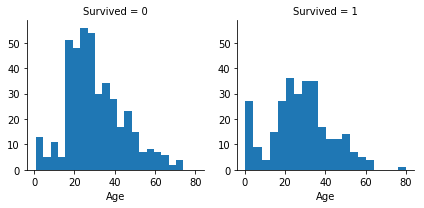

In [17]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

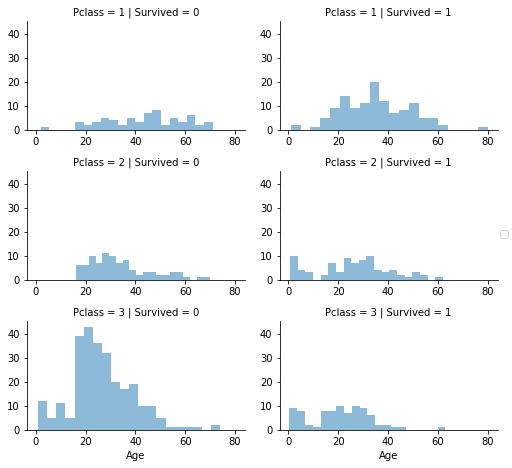

In [18]:
grid = sns.FacetGrid(train_df,col='Survived',row='Pclass',size = 2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

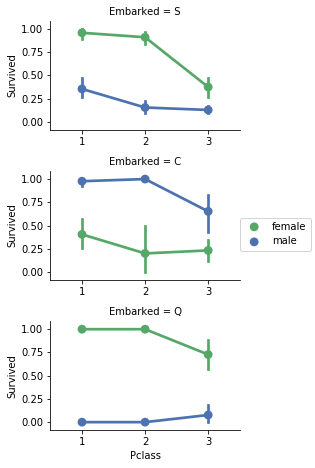

In [19]:
grid = sns.FacetGrid(train_df,row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

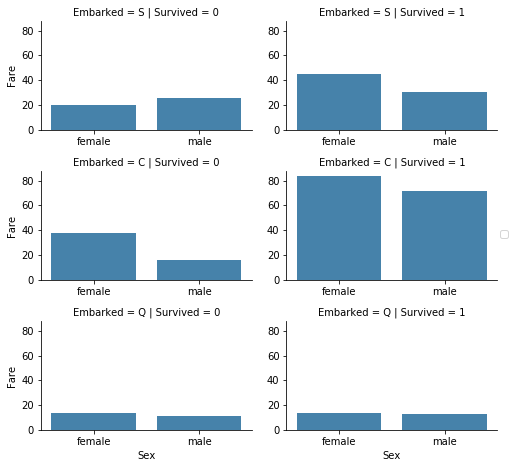

In [20]:
grid = sns.FacetGrid(train_df,row='Embarked',col = 'Survived',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=.9,ci=None)
grid.add_legend()

<h3>改造数据</h3><br>
根据已经证实的假设，来补充，创造新的特征

<b>丢弃特征</b><br>
根据之前的分析，我们发现Cabin和Ticket这两个特征对结果没啥明显的影响，相关性不强，丢弃

In [21]:
print 'Before',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape

train_df = train_df.drop(['Ticket','Cabin'],axis=1)
test_df = test_df.drop(['Ticket','Cabin'],axis=1)
combine = [train_df,test_df]

print 'After',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


<b>创建新特征</b>

In [22]:
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


把一些使用较少的称呼统一为Rare,把一些相同意义的称呼统一

In [23]:
# 训练集和测试集统一操作
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
# 查看各个称呼各自的存活率是多少
train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


把类别型的Title变为序数型的数字

In [24]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)#空值设为0
train_df.head()
# test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


现在我们已经提取出了Name特征中的Title信息，我们可以安全的drop掉Name特征和PassengerID特征了

In [25]:
train_df = train_df.drop(['Name','PassengerId'],axis=1)
test_df=test_df.drop(['Name'],axis=1)
combine = [train_df,test_df]
train_df.shape,test_df.shape

((891, 9), (418, 9))

<h3>把类别型数据转化为数值型数据</h3>

In [26]:
# 转化Sex特征
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


<h3>填充连续性数值数据</h3><br>
我们要估计并填充缺失数据或者空值（null）数据。首先我们填充Age属性。<br>
我们可以有三种方法来填充连续数值型数据：<br>
1、一个简单的方法就是根据均值和方差产生随机数；<br>
2、一个更准确的方法是根据特征之间的关联程度来产生数据。在这个例子中，我们记录Age，Gender和Pclass之间的关系。利用Gender和Pclass的特征组合的<b>中位数</b>来猜Age的可能取值。比如，Pclass=1且Gender=0的中位数<br>
3、结合方法1和方法2，我们用均值和方差产生的随机数代替根据中位数猜测的Age数据。<br>
其中，方法1和方法3我们会加入一些随机噪音，多次执行的结果可能不同。这里我们使用方法2。


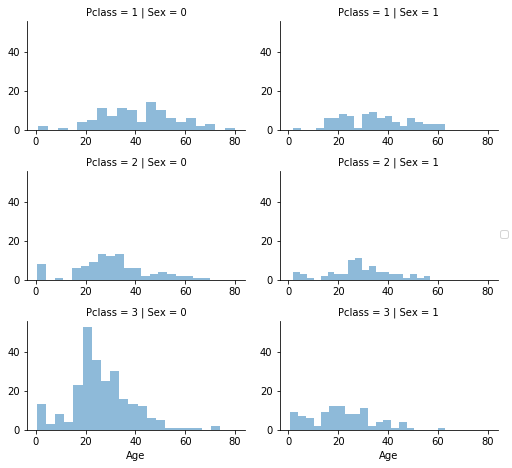

In [27]:
# 用条形图看看年龄分布
grid = sns.FacetGrid(train_df,'Pclass','Sex',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins = 20)
grid.add_legend()

In [28]:
# 先用guess_ages来存储待预测数据
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [29]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex']==i)&(dataset['Pclass']==j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            
            # 把不是0.5的小数位变为接近0.5
            guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5
    for i in range(0,2):
        for j in range(0,3):
            # 选取行，列
            dataset.loc[(dataset.Age.isnull())&(dataset.Sex == i)&(dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
# train_df.info()
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


创造AgeBand特征，并看看这个特征与存活率的关系

In [30]:
train_df['AgeBand'] = pd.cut(train_df['Age'],5)
train_df[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


把Age这一列用AgeBand替代掉

In [31]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


去掉AgeBand这一列

In [32]:
train_df = train_df.drop(['AgeBand'],axis=1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


<h3>根据已有特征构建新特征</h3>

我们根据SibSp和Parch来构建一个FamilySize的特征。这样我们就可以Drop掉Sibsp和Parch这两个特征了。

In [33]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp']+dataset['Parch'] +1
train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


构建一个IsAlone的特征：

In [34]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1,'IsAlone'] = 1
train_df[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


drop SibSp Parch FamilySize 

In [35]:
train_df = train_df.drop(['SibSp','Parch','FamilySize'],axis=1)
test_df = test_df.drop(['SibSp','Parch','FamilySize'],axis=1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


我们也可以构造一个人造的特征：Pclass*Age

In [36]:
for dataset in combine:
    dataset['Age*Class'] = dataset['Age'] * dataset['Pclass']
    
train_df.loc[:,['Age*Class','Age','Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [37]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,S,1,0,3
1,1,1,1,2,71.2833,C,3,0,2
2,1,3,1,1,7.9250,S,2,1,3
3,1,1,1,2,53.1000,S,3,0,2
4,0,3,0,2,8.0500,S,1,1,6


<h3>填充Embarked特征</h3>

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null int64
Fare         891 non-null float64
Embarked     889 non-null object
Title        891 non-null int64
IsAlone      891 non-null int64
Age*Class    891 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 62.7+ KB


发现仅仅缺少2个数据，那我们就用出现次数最多的那个Embarked来填充

In [39]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [40]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


把Embarked特征转化为数值型特征：

In [41]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [42]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


<h3>处理Fare特征：填充，转换</h3>

In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null int64
Fare         891 non-null float64
Embarked     891 non-null int64
Title        891 non-null int64
IsAlone      891 non-null int64
Age*Class    891 non-null int64
dtypes: float64(1), int64(8)
memory usage: 62.7 KB


In [44]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null int64
Title          418 non-null int64
IsAlone        418 non-null int64
Age*Class      418 non-null int64
dtypes: float64(1), int64(8)
memory usage: 29.5 KB


发现仅仅是test_df少了一条数据,用众数补充

In [45]:
# inplace 参数的意思：？
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


创造FareBand特征

In [46]:
# qcut--按百分比切割  cut--按极差切割
train_df['FareBand'] = pd.qcut(train_df['Fare'],4)
train_df[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean()

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


把Fare转换为FareBand

In [47]:
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.91,'Fare']=0
    dataset.loc[(dataset['Fare']>7.91)&(dataset['Fare']<=14.454),'Fare'] = 1
    dataset.loc[(dataset['Fare']>14.454)&(dataset['Fare']<=31.0),'Fare'] = 2
    dataset.loc[(dataset['Fare']>31.0)&(dataset['Fare']<=512.329),'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
# train_df.head(20)
train_df = train_df.drop(['FareBand'],axis=1)
combine = [train_df,test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [48]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3


<h2>建模，预测</h2>

现在，我们转备好去训练一个模型来预测问题。

In [49]:
X_train = train_df.drop(['Survived'],axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop(['PassengerId'],axis=1).copy()
X_train.shape,Y_train.shape,X_test.shape

((891, 8), (891,), (418, 8))

LogisticRegression适合在一开始的时候使用。

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,Y_train)*100,2)
acc_log

80.13

我们可以用LogisticRegression的相关系数来判断我们构造的特征是否和我们要解决的问题有相关性。系数的绝对值越大，它对应的特征的相关性就越大。

In [51]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation',ascending=False)

,Features,Correlation
1,Sex,2.205117
5,Title,0.394170
2,Age,0.274682
4,Embarked,0.256388
6,IsAlone,0.229047
3,Fare,0.010246
7,Age*Class,-0.299192
0,Pclass,-0.684866


可以看出，Sex是对结果又重要的影响（male:0,female:1），女性更容易获救。<br>
Pclass也有重要的影响，Pclass值越大，越不容易获救，也就是船舱等级越低，越不容易获救。<br>
发现Title是一个很好的特征。
Age*Class也是一个有影响的特征。

接下来试一下SVM

In [52]:
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train,Y_train)*100,2)
acc_svc

84.06

试用一下随机森林

In [53]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
acc_rf = round(rf.score(X_train,Y_train)*100,2)
acc_rf

86.87

随机森林的准确率较高

In [54]:
submission = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':Y_pred
})
submission.to_csv('./submission.csv',index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


接下来提交CSV文件较好了。

<h2>总结</h2>

这是第一次完整的处理一份数据并进行建模预测，整个过程中，重点是熟悉了特征处理的思路和方法，建模预测的部分考虑的比较少。<br>
总体的流程是：
<ul>
<li>首先明确问题，关注一些先验信息；获取数据（包括训练数据与测试数据）</li>
<li>观察数据，进行基础的分析，观察数据的类型，数据的完整程度，数据分布的情况</li>
<li>提出一些假设，哪些特征可能无关，哪些特征需要补全，哪些特征可能有错（异常值），哪些特征怎么转化，哪些特征可以被构造，可以人造哪些特征等等</li>
<li>有些假设可以在基础数据之上进行证实，可以配合图标进行理解,不容易理解的特征需要在建模阶段才能看出其相关性</li>
<li>根据之前的假设进行特征工程</li>
<li>选择合适的模型，建模预测（LogisticRegression,SVM,集成学习）</li>
</ul>

在这次学习过程中，增强了对特征工程的理解，熟悉了pandas的使用（真的强大）。<br>
改进：
<li>依然可以继续挖掘特征，以后有机会可以试试。</li>
<li>模型应用的十分简单，很多模型的细节没有考虑到，接下来要重点关注模型的原理和应用</li>
<li>没有做交叉验证，没有做模型的对比</li>
<li>模型评估仅用了accuracy</li>